In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('F:\Data set\stroke.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

Dataset is Imbalanced,stroke and no stroke are not represented equally

In [8]:
data['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [9]:
#Checking Null Values
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Bmi has 201 null values 

In [10]:
#Handling null Values 
data['bmi']=data['bmi'].fillna(data['bmi'].median())

In [11]:
data['bmi'].isna().sum()

0

In [27]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [26]:
data.groupby('gender')['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: count, dtype: int64

Data Visualization

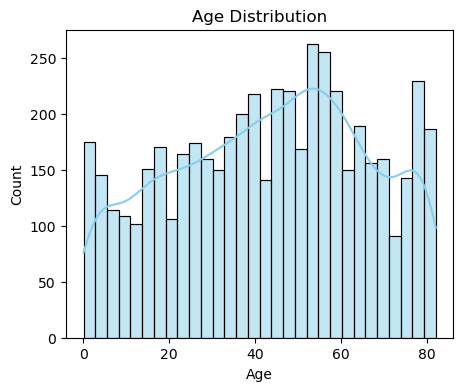

In [12]:
#Age Distribution
plt.figure(figsize=(5,4))
sns.histplot(data=data,x='age',kde=True,bins=30,color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Insight:The age group between 40 and 65 years has the highest number of entries peaking around 55-60
        This Could indicate a higher risk group for stroke or more medical attention around that age 

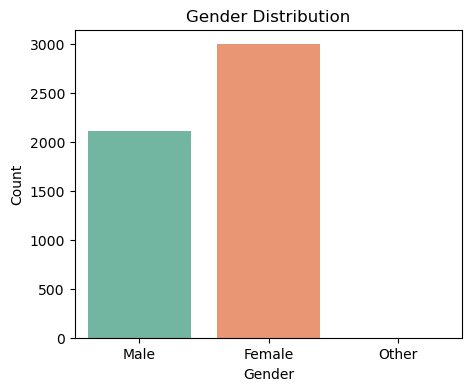

In [13]:
#Geneder Distribution
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='gender',palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

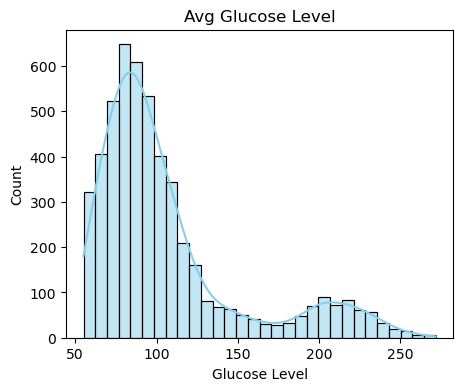

In [14]:
#Average Glucose Level Distribution
plt.figure(figsize=(5,4))
sns.histplot(data=data,x='avg_glucose_level',kde=True,bins=30,color='skyblue')
plt.title('Avg Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()

Insight:The majority of glucose levels are concentrated between 50 and 150 with peak around100-120
        The distribution is slightely skewed to the right towards higher glucose levels up to 250

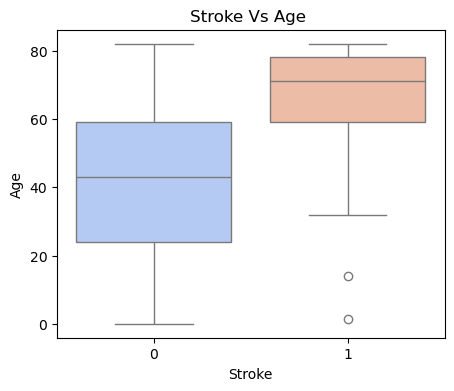

In [15]:
#Stroke Vs Age
plt.figure(figsize=(5,4))
sns.boxplot(data=data,x='stroke',y='age',palette='coolwarm')
plt.title('Stroke Vs Age ')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

Insight:For Individual without stroke (0) the median age is around 40-50
        For those with stroke (1), the median age is higher, around 60-70
        There are some outliers for the stroke group, indicating a few younger individuals (below 50) who experienced a stroke.
        Overall, stroke occurrence is associated with older age, with a noticeable shift in the age distribution toward higher values.

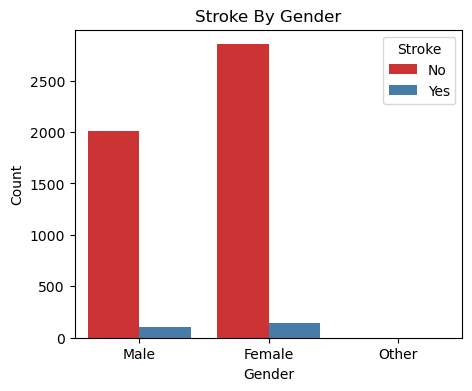

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='gender',hue='stroke',palette='Set1')
plt.title('Stroke By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke',labels=['No','Yes'])
plt.show()

Insights:Among males, the count of no stroke (red) is significantly higher (around 2000) compared to yes stroke (blue, around 100-200)
         Among females, the count of no stroke (red) is also higher (around 2000) compared to yes stroke (blue, around 100-200).
         The "Other" category has negligible counts for both stroke and no stroke.
         There is no significant gender-based difference in the proportion of stroke occurrences, with both males and females showing a similar low              incidence of stroke relative to no stroke.

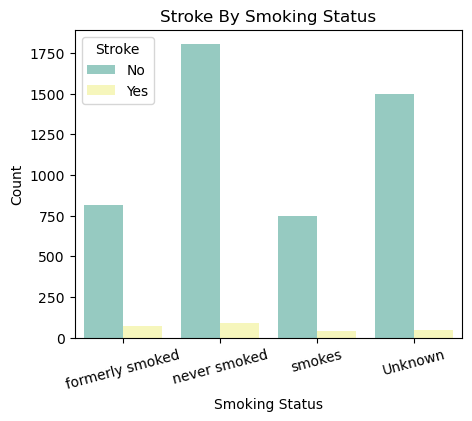

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='smoking_status',hue='stroke',palette='Set3')
plt.title('Stroke By Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke',labels=['No','Yes'])
plt.xticks(rotation=15)
plt.show()

Insights:The majority of individuals are in the "never smoked" category, with a count of around 1500-1750 for no stroke and a small number for yes                stroke.
         "Formerly smoked" and "smokes" categories have lower counts, around 750 and 1250 respectively, with most indicating no stroke.
          Stroke incidence (yes) is relatively low across all smoking status categories, with no significant variation based on smoking status.

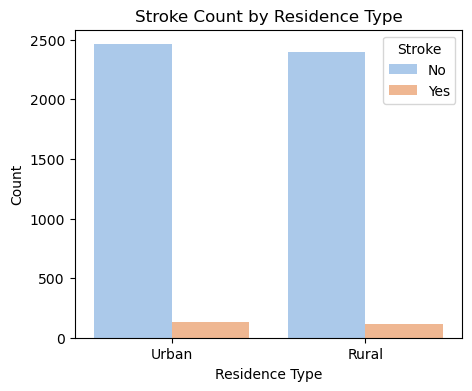

In [18]:
# Socio Demographic
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='Residence_type', hue='stroke', palette='pastel')
plt.title("Stroke Count by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Count")
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

Insights:Both urban and rural residence types have a high count of individuals with no stroke, around 2000-2500 each.
         The count of stroke occurrences (yes) is low for both urban and rural areas, with slightly higher numbers in urban compared to rural .
         The majority of individuals in both residence types do not experience a stroke

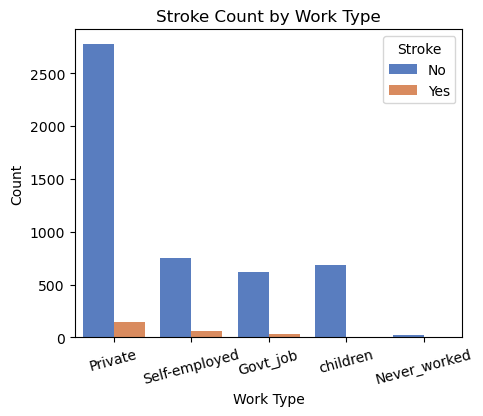

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='work_type', hue='stroke', palette='muted')
plt.title("Stroke Count by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

Insights:Stroke incidence is low across all work types, with the "Private" category having the highest absolute number of stroke cases but still a               small proportion compared to no stroke.

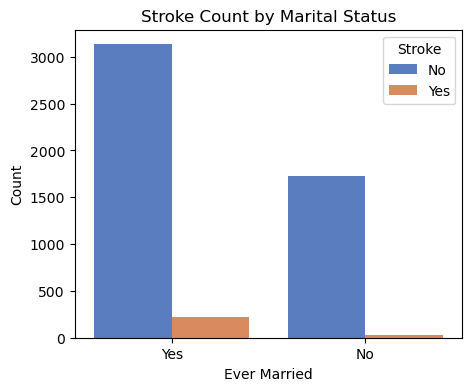

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='ever_married', hue='stroke', palette='muted')
plt.title("Stroke Count by Marital Status")
plt.xlabel("Ever Married")
plt.ylabel("Count")
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

Insighs:Stroke incidence is higher among those who have ever been married compared to those who have not, though the majority in both groups do not             experience a stroke.

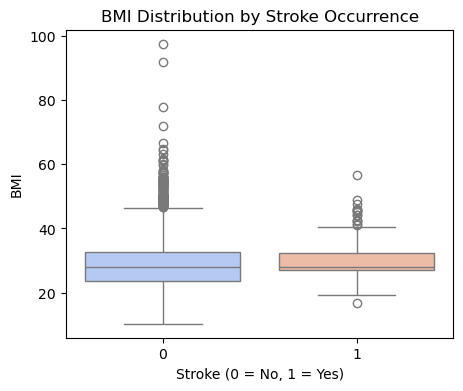

In [21]:
plt.figure(figsize=(5,4))
sns.boxplot(data=data, x='stroke', y='bmi', palette='coolwarm')
plt.title("BMI Distribution by Stroke Occurrence")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

Insights:For individuals without stroke (0), the median BMI is around 30-35, with an interquartile range (IQR) spanning approximately 25-40. There are           several outliers above 60.
         For individuals with stroke (1), the median BMI is slightly higher, around 35-40, with a narrower IQR of about 30-45. Outliers are present              above 60 as well.
         The BMI distribution for both groups shows a similar range, but those with stroke tend to have a slightly higher median and a tighter IQR,              suggesting a potential association between higher BMI and stroke occurrence, though with significant variability.

In [28]:
#Dropping Irrelevant Column
data=data.drop(['id'],axis=1)

In [30]:
#encoding Non Numeric Columns
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [31]:
column_en=['gender','ever_married','work_type','Residence_type','smoking_status']
for i in column_en:
    data[i]=lb.fit_transform(data[i])

In [32]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


DATA MODELING

In [33]:
X=data.drop('stroke',axis=1)
y=data['stroke']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [35]:
#Handling Imbalanced data using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

In [36]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_sm,y_train_sm)
rf_pred=rf.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
print("Classification Report")
print(classification_report(y_test,rf_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,rf_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1198
           1       0.19      0.20      0.20        80

    accuracy                           0.90      1278
   macro avg       0.57      0.57      0.57      1278
weighted avg       0.90      0.90      0.90      1278

Confusion Matrix
[[1130   68]
 [  64   16]]


In [38]:
#Xgboost
from xgboost import XGBClassifier
xgb =XGBClassifier(random_state=42)
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb=xgb.predict(X_test)

In [39]:
print("Classification Report")
print(classification_report(y_test,y_pred_xgb))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_xgb))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1198
           1       0.15      0.14      0.14        80

    accuracy                           0.90      1278
   macro avg       0.55      0.54      0.54      1278
weighted avg       0.89      0.90      0.89      1278

Confusion Matrix
[[1135   63]
 [  69   11]]


In [42]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

age                  41.226554
avg_glucose_level    18.960942
bmi                  15.923006
work_type             6.580023
smoking_status        5.615910
gender                3.400504
Residence_type        3.087836
ever_married          2.331745
hypertension          1.636617
heart_disease         1.236862
dtype: float64

In [43]:
pd.Series(xgb.feature_importances_,index=X.columns).sort_values(ascending=False)*100

age                  16.375652
work_type            12.205616
Residence_type       11.783473
gender               11.643687
ever_married         10.844893
heart_disease        10.740655
hypertension          9.015905
avg_glucose_level     5.901216
smoking_status        5.753015
bmi                   5.735892
dtype: float32

Feature Importance (Random Forest):
I analyzed which features most influenced stroke prediction. The top contributors were:
Age, Average Glucose Level, and BMI — these accounted for over 75% of the total feature importance and align well with established medical risk factors.

In XGBoost, the feature importance is more evenly distributed, unlike Random Forest where a few features dominated. Age is still the most important feature — confirming its strong influence.
Features like residence type, gender, ever married are more significant here than in Random Forest. XGBoost might be learning more complex interactions.
Avg glucose level and BMI, which were very important in RF, are less impactful in XGBoost.